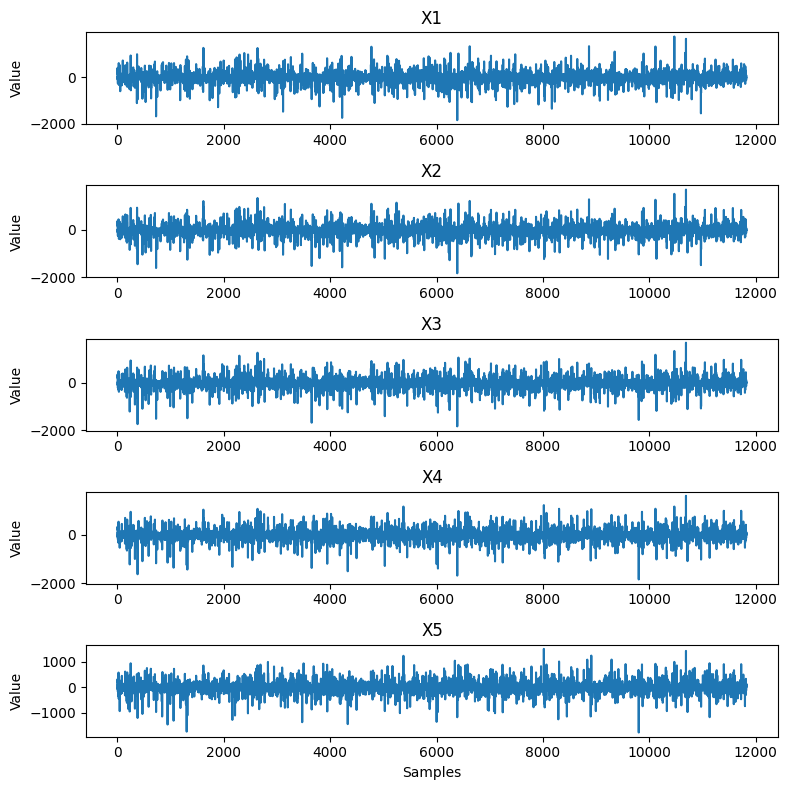

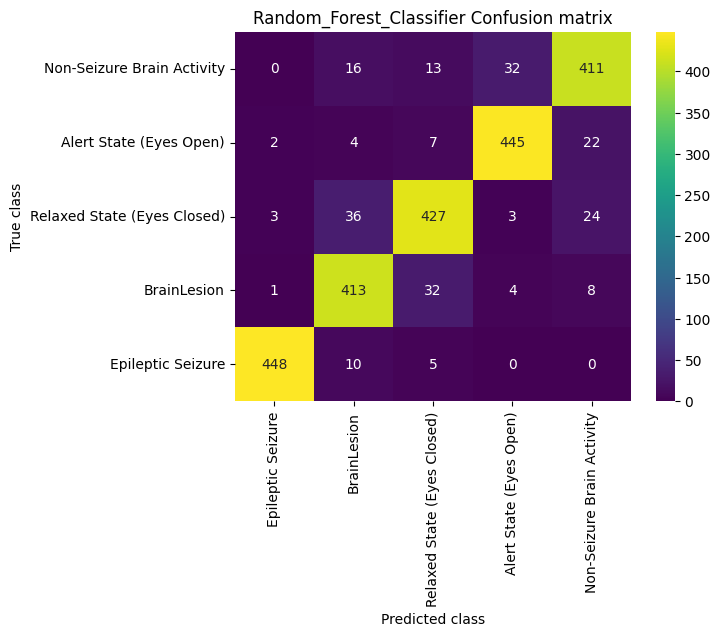

Training Accuracy: 96.21%


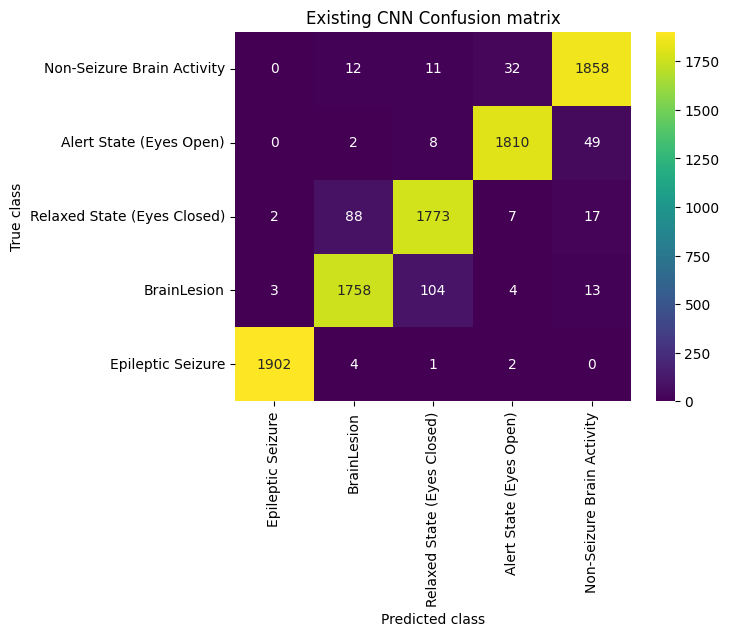

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\abhil\AppData\Local\Programs\Python\Python37\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Users\abhil\AppData\Local\Temp\ipykernel_9044\3619410053.py", line 255, in Detection
    predicted_outcome = labels[predicted_index]  # Convert index to label
IndexError: list index out of range


In [ ]:
from tkinter import messagebox
from tkinter import *
from tkinter import simpledialog
import tkinter
from tkinter import filedialog
from tkinter.filedialog import askopenfilename
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import model_from_json

labels = ["Epileptic Seizure","BrainLesion","Relaxed State (Eyes Closed)","Alert State (Eyes Open)","Non-Seizure Brain Activity"]

 
#fucntion to upload dataset
def uploadDataset():
    global filename, dataset
    text.delete('1.0', END)
    filename = filedialog.askopenfilename(initialdir="Dataset") #upload dataset file
    text.insert(END,filename+" loaded\n\n")
    dataset = pd.read_csv(filename) #read dataset from uploaded file
    text.insert(END,"Dataset Values\n\n")
    text.insert(END,str(dataset.head()))
    
def preprocessing():
    text.delete('1.0', END)
    global dataset, scaler
    global X_train, X_test, y_train, y_test, X, Y,sc
    #replace missing values with 0
    dataset.fillna(0, inplace = True)
    dataset=dataset.drop('Unnamed',axis=1)
    X= dataset.iloc[:,0:178]
    Y = dataset.iloc[:, -1]
    text.insert(END,"Dataset after features normalization\n\n")
    text.insert(END,str(X)+"\n\n")
    text.insert(END,"Total records found in dataset : "+str(X.shape[0])+"\n")
    text.insert(END,"Total features found in dataset: "+str(X.shape[1])+"\n\n")
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    text.insert(END,"Dataset Train and Test Split\n\n")
    text.insert(END,"80% dataset records : "+str(X_train.shape[0])+"\n")
    text.insert(END,"20% dataset records : "+str(X_test.shape[0])+"\n")
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test  = sc.fit_transform(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
def eda():
    text.delete('1.0', END)
    global dataset
    #replace missing values with 0
    dataset.fillna(0, inplace = True)
    # Assuming your data is in a DataFrame named 'df'
    # If not, replace 'df' with the actual variable containing your data

    # Create subplots
    plt.figure(figsize=(8,8))

    # Subplot 1
    plt.subplot(5, 1, 1)  # 5 rows, 1 column, 1st subplot
    plt.plot(dataset['X1'])
    plt.title('X1')
    plt.ylabel('Value')

    # Subplot 2
    plt.subplot(5, 1, 2)  # 5 rows, 1 column, 2nd subplot
    plt.plot(dataset['X2'])
    plt.title('X2')
    plt.ylabel('Value')

    # Subplot 3
    plt.subplot(5, 1, 3)  # 5 rows, 1 column, 3rd subplot
    plt.plot(dataset['X3'])
    plt.title('X3')
    plt.ylabel('Value')

    # Subplot 4
    plt.subplot(5, 1, 4)  # 5 rows, 1 column, 4th subplot
    plt.plot(dataset['X4'])
    plt.title('X4')
    plt.ylabel('Value')

    # Subplot 5
    plt.subplot(5, 1, 5)  # 5 rows, 1 column, 5th subplot
    plt.plot(dataset['X5'])
    plt.title('X5')
    plt.xlabel('Samples')
    plt.ylabel('Value')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()



def calculateMetrics(algorithm, testY, predict):
    global labels
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    text.insert(END,algorithm+" Accuracy  : "+str(a)+"\n")
    text.insert(END,algorithm+" Precision : "+str(p)+"\n")
    text.insert(END,algorithm+" Recall    : "+str(r)+"\n")
    text.insert(END,algorithm+" FSCORE    : "+str(f)+"\n\n")
    conf_matrix = confusion_matrix(testY, predict)
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show() 

def run_RFC():
    text.delete('1.0', END)
    global X_train, X_test, y_train, y_test, X, Y
    global accuracy, precision, recall, fscore
    accuracy = []
    precision = []
    recall = []
    fscore = []
    
    # Check if the pkl file exists
    if os.path.exists('model/RFC_weights.pkl'):
        # Load the model from the pkl file
        rf_classifier= joblib.load('model/RFC_weights.pkl')
        predict = rf_classifier.predict(X_test)
        calculateMetrics("Random_Forest_Classifier", predict, y_test)
    else:
        clf = RandomForestClassifier()
        # Train the classifier on the training data
        clf.fit(X_train, y_train)
        # Make predictions on the test data
        predict=clf.predict(X_test)
        joblib.dump(clf, 'model/RFC_weights.pkl')
        print("Random_Forest_Classifier Model trained and model weights saved.")
        calculateMetrics("Existing RFC", predict, y_test)
def runCNN():
    global loaded_model
    if os.path.exists(model_architecture_path) and os.path.exists(model_weights_path):
        # Load the pre-trained model
        X_train1 = X_train.reshape((9460, 178, 1))
        X_test1 = X_test.reshape((2366, 178, 1))
        with open(model_architecture_path, 'r') as json_file:
            loaded_model_json = json_file.read()
        #print(loaded_model_json.summary())
        loaded_model = model_from_json(loaded_model_json)
        loaded_model.load_weights(model_weights_path)
        # Calculate training accuracy
        y_train_pred = np.argmax(loaded_model.predict(X_train1), axis=1)
        training_accuracy = accuracy_score(y_train, y_train_pred)
        print(f"Training Accuracy: {training_accuracy * 100:.2f}%")
        calculateMetrics("Existing CNN",y_train, y_train_pred)
    else:
        # Initialize the model
        model = Sequential()
        # First Convolutional Layer
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(178, 1)))
        model.add(MaxPooling1D(pool_size=2))
        # Second Convolutional Layer
        model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        # Third Convolutional Layer
        model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        # Global Average Pooling Layer
        model.add(GlobalAveragePooling1D())

        # Fully Connected Layer
        model.add(Dense(128, activation='relu'))

        # Output Layer (for classification tasks)
        model.add(Dense(6, activation='softmax'))

        # Compile the model
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Print the model summary
        model.summary()
        print(model.summary)
        # Assuming X_train and X_test are your input data
        # Shape of X_train: (9460, 178)
        # Check actual shape before reshaping
        print(f"Original shape of X_train: {X_train.shape}")
        print(f"Original shape of X_test: {X_test.shape}") 
        # Reshape the data to have the necessary dimensions
        X_train1 = X_train.reshape((9460, 178, 1))
        X_test1 = X_test.reshape((2366, 178, 1))

        model.fit(X_train1, y_train,epochs=250, batch_size=64,validation_data=(X_test1, y_test))
        # Assuming 'model' is your trained model

        # Save model architecture as JSON
        model_json = model.to_json()
        with open("model_architecture.json", "w") as json_file:
            json_file.write(model_json)

        # Save model weights as HDF5
        model.save_weights("model_weights.h5")

        # Optionally, you can save the entire model (architecture + weights)
        # This allows you to later load the model in one step
        model.save("full_model.h5")


def Detection():
    text.delete('1.0', END)
    
    global sc, classifier, loaded_model, labels
    
    filename = filedialog.askopenfilename(initialdir="Dataset")
    dataset = pd.read_csv(filename)
    dataset.fillna(0, inplace=True)

    # Ensure scaler is already trained
    scaled_test1 = sc.transform(dataset)  # Use transform instead of fit_transform
    reshaped_test = scaled_test1.reshape((scaled_test1.shape[0], scaled_test1.shape[1], 1))  # Dynamic reshape

    # Make predictions
    predictions = loaded_model.predict(reshaped_test)

    test_temp = pd.read_csv(filename)  # Read data from uploaded file
    for index, row in test_temp.iterrows():
        if index >= len(predictions):
            break  # Prevent index out of range
        
        predicted_index = np.argmax(predictions[index])  # Get class index
        predicted_outcome = labels[predicted_index]  # Convert index to label
        
        text.insert(END, f'Row {index + 1}: {row.to_dict()} - Predicted Outcome: {predicted_outcome}\n\n')

                     
import tkinter as tk

def show_admin_buttons():
    # Clear ADMIN-related buttons
    clear_buttons()
    # Add ADMIN-specific buttons
    tk.Button(main, text="Upload Dataset", command=uploadDataset, font=font1).place(x=330, y=550)
    tk.Button(main, text="Eda", command=eda, font=font1).place(x=500, y=550)  
    tk.Button(main, text="Preprocess Dataset", command=preprocessing, font=font1).place(x=600, y=550)
    tk.Button(main, text="Existing RFC", command=run_RFC, font=font1).place(x=800, y=550)
    tk.Button(main, text="Proposed CNN", command=runCNN, font=font1).place(x=1050, y=550)

def show_user_buttons():
    # Clear USER-related buttons
    clear_buttons()
    # Add USER-specific buttons
    tk.Button(main, text="Prediction From Test Data", command=Detection, font=font1).place(x=330, y=650)

def clear_buttons():
    # Remove all buttons except ADMIN and USER
    for widget in main.winfo_children():
        if isinstance(widget, tk.Button) and widget not in [admin_button, user_button]:
            widget.destroy()

# Initialize the main tkinter window
main = tk.Tk()
screen_width = main.winfo_screenwidth()
screen_height = main.winfo_screenheight()
main.geometry(f"{screen_width}x{screen_height}")

# Configure title
font = ('times', 18, 'bold')
title = Label(main, text='Deep Learning Approaches for Epileptic Seizure Detection and Classification')
title.config(bg='white', fg='black')  
title.config(font=font)           
title.config(height=3, width=120)       
title.place(x=0,y=5)

# ADMIN and USER Buttons (Always visible)
font1 = ('times', 12, 'bold')
admin_button = tk.Button(main, text="ADMIN", command=show_admin_buttons, font=font1, width=20, height=2, bg='LightBlue')
admin_button.place(x=50, y=550)

user_button = tk.Button(main, text="USER", command=show_user_buttons, font=font1, width=20, height=2, bg='LightGreen')
user_button.place(x=50, y=650)


font1 = ('times', 12, 'bold')
text=Text(main,height=20,width=180)
scroll=Scrollbar(text)
text.configure(yscrollcommand=scroll.set)
text.place(x=50,y=120)
text.config(font=font1)
main.config(bg='Cyan2')
main.mainloop()

# Deep Learning Approaches for Epileptic Seizure Detection and Classification

# Importing the libraries

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import model_from_json
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Load the Dataset

In [4]:
Dataset= pd.read_csv('Epileptic Seizure Recognition.csv')
Dataset

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11821,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11822,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11823,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11824,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [5]:
Dataset.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [6]:
Dataset.columns

Index(['Unnamed', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178',
       'y'],
      dtype='object', length=180)

In [7]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11826 entries, 0 to 11825
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 16.2+ MB


In [8]:
Dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,...,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000
mean,-11.296973,-10.539066,-9.859462,-8.864198,-7.902672,-7.055556,-6.745392,-7.051666,-6.995180,-6.580247,...,-9.694402,-11.263656,-12.626670,-13.367664,-13.069677,-12.864874,-12.643666,-12.565280,-12.488246,3.001860
std,164.809886,165.563067,163.156001,160.974175,160.765817,161.142157,161.395911,162.195692,162.274999,160.857590,...,164.983942,166.046850,168.315584,168.530304,167.478165,164.402136,162.849348,162.833644,165.148323,1.415049
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.000000,-1840.000000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.000000,-55.000000,-54.000000,...,-55.000000,-55.000000,-56.000000,-56.000000,-55.000000,-55.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-7.000000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.000000,36.000000,36.000000,...,34.000000,34.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.000000,2047.000000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [9]:
Dataset.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [10]:
#Cleaning unnecessary data
df=Dataset.drop('Unnamed',axis=1)

In [11]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11821,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,2
11822,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11823,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11824,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,3


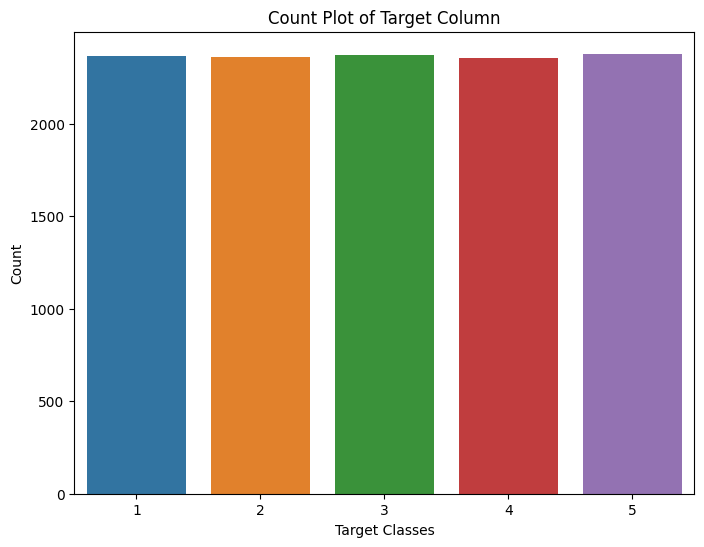

In [12]:
# Create a count plot of the target column
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df)

# Add labels and title
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count Plot of Target Column')

# Show the plot
plt.show()

# Checking Missing Data

In [13]:
df.isnull().sum()

X1      0
X2      0
X3      0
X4      0
X5      0
       ..
X175    0
X176    0
X177    0
X178    0
y       0
Length: 179, dtype: int64

In [14]:
# Defining X and Y

In [15]:
X = df.iloc[:,0:178].values
X

array([[ 135,  190,  229, ..., -116,  -83,  -51],
       [ 386,  382,  356, ...,  154,  143,  129],
       [ -32,  -39,  -47, ...,  -35,  -35,  -36],
       ...,
       [  14,    6,  -13, ...,   -2,   -1,   -8],
       [ -40,  -25,   -9, ...,   68,   59,   55],
       [  29,   41,   57, ...,   -2,    2,   20]], dtype=int64)

In [16]:
y = df['y'].values
y
le=LabelEncoder()
y=le.fit_transform(y)

In [17]:
y

array([3, 0, 4, ..., 4, 2, 3], dtype=int64)

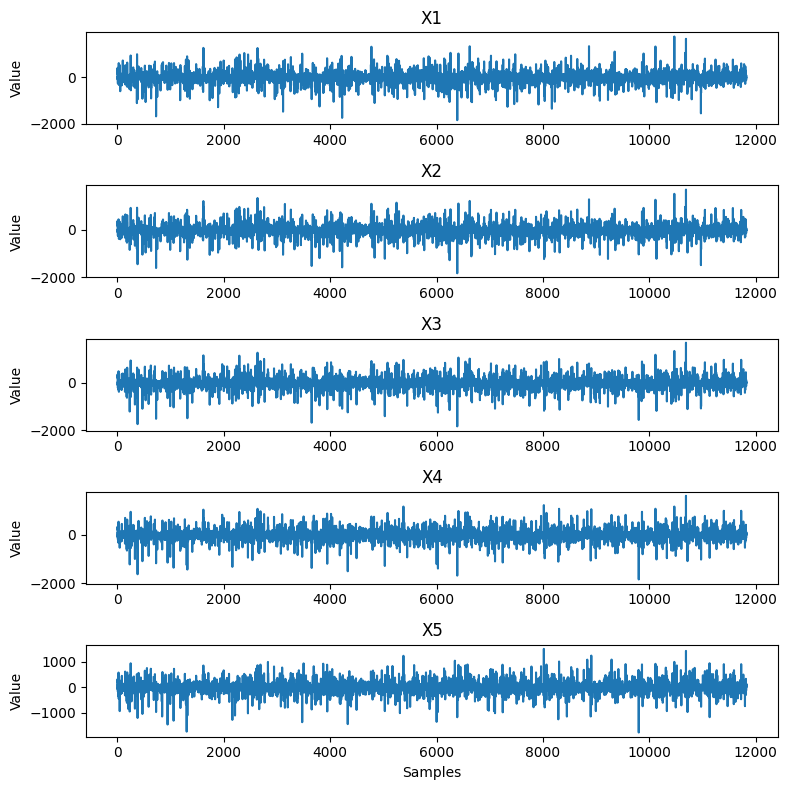

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'
# If not, replace 'df' with the actual variable containing your data

# Create subplots
plt.figure(figsize=(8,8))

# Subplot 1
plt.subplot(5, 1, 1)  # 5 rows, 1 column, 1st subplot
plt.plot(df['X1'])
plt.title('X1')
plt.ylabel('Value')

# Subplot 2
plt.subplot(5, 1, 2)  # 5 rows, 1 column, 2nd subplot
plt.plot(df['X2'])
plt.title('X2')
plt.ylabel('Value')

# Subplot 3
plt.subplot(5, 1, 3)  # 5 rows, 1 column, 3rd subplot
plt.plot(df['X3'])
plt.title('X3')
plt.ylabel('Value')

# Subplot 4
plt.subplot(5, 1, 4)  # 5 rows, 1 column, 4th subplot
plt.plot(df['X4'])
plt.title('X4')
plt.ylabel('Value')

# Subplot 5
plt.subplot(5, 1, 5)  # 5 rows, 1 column, 5th subplot
plt.plot(df['X5'])
plt.title('X5')
plt.xlabel('Samples')
plt.ylabel('Value')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


##  Splitting the Dataset into the Training set and Test set


In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
X_train.shape

(9460, 178)

# Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train

array([[ 0.301178  ,  0.37305916,  0.42147141, ...,  0.41215094,
         0.4204843 ,  0.33667632],
       [-0.04988079,  0.09169929,  0.17355322, ..., -0.358178  ,
        -0.43060561, -0.34590428],
       [ 0.19031733,  0.17121404,  0.13016753, ..., -0.08887601,
        -0.20531711, -0.18602054],
       ...,
       [ 0.5844886 ,  0.49538954,  0.37188777, ..., -0.05756183,
        -0.04886675,  0.02920758],
       [-0.48100562, -0.47713696, -0.39665863, ..., -0.10766452,
        -0.06138278, -0.00153929],
       [ 0.70766712,  0.80121548,  0.78095279, ..., -0.10766452,
         0.03248743,  0.0968507 ]])

# BUILDING MODEL

In [23]:
#RANDOMFORREST CLASSIFIER

In [24]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
Y_pred=rf.predict(X_test)

In [25]:
Y_pred

array([2, 4, 4, ..., 3, 4, 2], dtype=int64)

In [26]:
acc=accuracy_score(y_test,Y_pred)*100
print("Random Forest Classifier Accuracy:",acc)

Random Forest Classifier Accuracy: 71.17497886728657


In [27]:
report=classification_report(y_test,Y_pred)
print("Random Forest Classifier Classificaion_report:\n",report)

Random Forest Classifier Classificaion_report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       488
           1       0.64      0.61      0.62       456
           2       0.61      0.57      0.59       492
           3       0.75      0.77      0.76       447
           4       0.61      0.65      0.63       483

    accuracy                           0.71      2366
   macro avg       0.71      0.71      0.71      2366
weighted avg       0.71      0.71      0.71      2366



In [28]:
cm=confusion_matrix(y_test,Y_pred)
cm

array([[465,   9,   6,   8,   0],
       [ 20, 276,  98,  12,  50],
       [ 11, 113, 281,  22,  65],
       [  0,   6,  11, 346,  84],
       [  0,  29,  66,  72, 316]], dtype=int64)

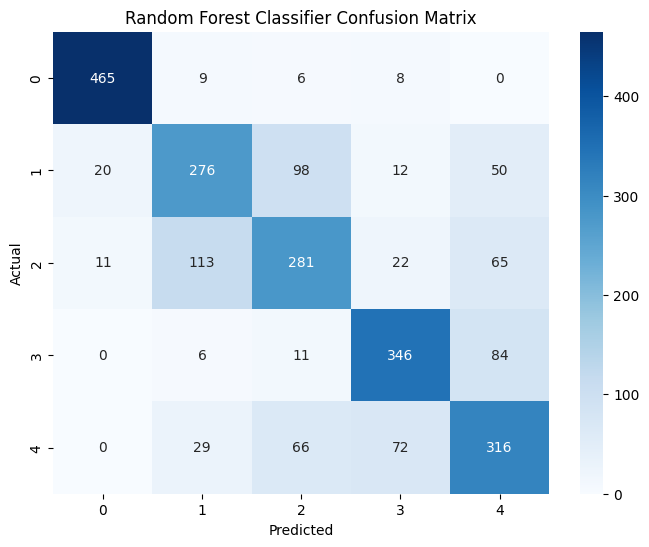

In [29]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.title("Random Forest Classifier Confusion Matrix")
plt.ylabel('Actual')
plt.show()

In [30]:
X_test.shape


(2366, 178)

In [31]:
X_train.shape

(9460, 178)

In [34]:
Original shape of X_train: (8278, 178,1)
Original shape of X_test: (3548, 178,1)

    
X_test = X_test.reshape((2366, 178, 1))
X_train = X_train.reshape((9460, 178, 1))

SyntaxError: invalid syntax (634215397.py, line 1)

In [32]:
# Define paths for the model files
model_architecture_path = 'model_architecture.json'
model_weights_path = 'model_weights.h5'
X_test = X_test.reshape((2366, 178, 1))
X_train = X_train.reshape((9460, 178, 1))
# Check if the model files exist
if os.path.exists(model_architecture_path) and os.path.exists(model_weights_path):
    # Load the pre-trained model
    with open(model_architecture_path, 'r') as json_file:
        loaded_model_json = json_file.read()
    #print(loaded_model_json.summary())
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(model_weights_path)

    # Calculate training accuracy
    y_train_pred = np.argmax(loaded_model.predict(X_train), axis=1)
    training_accuracy = accuracy_score(y_train, y_train_pred)

    print(f"Training Accuracy: {training_accuracy * 100:.2f}%")
else:

    # Initialize the model
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(178, 1)))
    model.add(MaxPooling1D(pool_size=2))

    # Second Convolutional Layer
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # Third Convolutional Layer
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # Global Average Pooling Layer
    model.add(GlobalAveragePooling1D())

    # Fully Connected Layer
    model.add(Dense(128, activation='relu'))

    # Output Layer (for classification tasks)
    model.add(Dense(5, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Print the model summary
    model.summary()
    print(model.summary)
    # Assuming X_train and X_test are your input data
    # Shape of X_train: (9460, 178)

    # Reshape the data to have the necessary dimensions
    X_train = X_train.reshape((9460, 178, 1))
    X_test = X_test.reshape((2366, 178, 1))

    model.fit(X_train, y_train,epochs=250, batch_size=64,validation_data=(X_test, y_test))
    # Assuming 'model' is your trained model

    # Save model architecture as JSON
    model_json = model.to_json()
    with open("model_architecture.json", "w") as json_file:
        json_file.write(model_json)

    # Save model weights as HDF5
    model.save_weights("model_weights.h5")

    # Optionally, you can save the entire model (architecture + weights)
    # This allows you to later load the model in one step
    model.save("full_model.h5")


Training Accuracy: 96.45%


In [ ]:
report=classification_report(y_train, y_train_pred)
print("CNN Classificaion_report:\n",report)
CM=confusion_matrix(y_train, y_train_pred)
CM
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.title("CNN Confusion Matrix")
plt.ylabel('Actual')
plt.show()

In [ ]:
CM=confusion_matrix(y_train, y_train_pred)
CM

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.title("CNN Confusion Matrix")
plt.ylabel('Actual')
plt.show()

In [ ]:
#prediction with test data


In [ ]:
prediction=np.argmax(loaded_model.predict(test),axis=1)
prediction

In [ ]:
file='test.csv'
test = pd.read_csv(file)
test=test.values
test=sc.fit_transform(test)
test = test.reshape((16, 178, 1))
# Define a function for making predictions
def predict(test):
    prediction = loaded_model.predict(test)
    return prediction


# Make a prediction
prediction_result = predict(test)
prediction_result=np.argmax(prediction_result,axis=1)
# Print the input and prediction side by side
print(f"Input: {test}  Prediction: {prediction_result}")